In [ ]:
sudo apt-get install -y tesseract-ocr
pip install pytesseract
pip install tensorflow==2.8.0
pip install protobuf==3.20.*
pip install boto3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [24]:
from label_extractions import LabelExtractor
from google.colab import files
from food_classifier import FoodClassifier

Select an input method:
1. Label Scanning
2. Plate Scanning
3. Manual Entry
Enter the number corresponding to your choice: 2


Saving Creme-brulee.jpg to Creme-brulee.jpg
Uploaded image: Creme-brulee.jpg


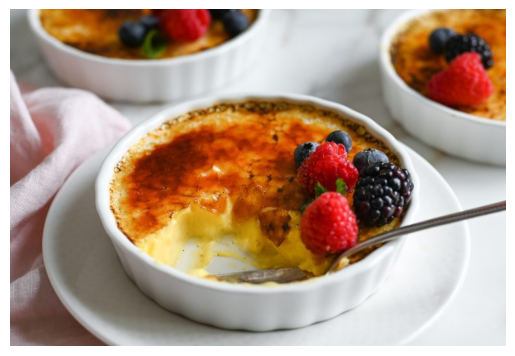

Predicted Class: creme_brulee
Estimated Weight: 1518.47 grams
No results found for creme_brulee.
Would you like to add one more or exit? (Enter 'add' for one more, 'exit' to quit): add
Select an input method:
1. Label Scanning
2. Plate Scanning
3. Manual Entry
Enter the number corresponding to your choice: 3
Enter the food name: samosa
Enter the quantity in grams: 100
Nutritional Facts for Given Weight:
{'Calories (kcal)': 686.0, 'Fat (g)': 3.2, 'Protein (g)': 5.1, 'Carbohydrates (g)': 28.0, 'Fiber (g)': 2.3, 'Sugars (g)': 1.8, 'Sodium (mg)': 0.38}
Would you like to add one more or exit? (Enter 'add' for one more, 'exit' to quit): exit
Exiting the program.


In [29]:


def label_scanning_block():
    # Step 1: Upload Image in Colab
    uploaded = files.upload()  # This will prompt for file upload
    image_file_name = next(iter(uploaded))  # Get the uploaded file name

    # Step 2: Process the Uploaded Image with LabelExtractor
    # Initialize the LabelExtractor class
    label_extractor = LabelExtractor()

    # Pass the image file name to the process_label method
    label_extractor.process_label(image_file_name)

def plate_scanning_block():
    model_path = 'food.h5'
    class_names = [
    "apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare",
    "beet_salad", "beignets", "bibimbap", "bread_pudding", "breakfast_burrito",
    "bruschetta", "caesar_salad", "cannoli", "caprese_salad", "carrot_cake",
    "ceviche", "cheesecake", "cheese_plate", "chicken_curry", "chicken_quesadilla",
    "chicken_wings", "chocolate_cake", "chocolate_mousse", "churros", "clam_chowder",
    "club_sandwich", "crab_cakes", "creme_brulee", "croque_madame", "cup_cakes",
    "deviled_eggs", "donuts", "dumplings", "edamame", "eggs_benedict",
    "escargots", "falafel", "filet_mignon", "fish_and_chips", "foie_gras",
    "french_fries", "french_onion_soup", "french_toast", "fried_calamari", "fried_rice",
    "frozen_yogurt", "garlic_bread", "gnocchi", "greek_salad", "grilled_cheese_sandwich",
    "grilled_salmon", "guacamole", "gyoza", "hamburger", "hot_and_sour_soup",
    "hot_dog", "huevos_rancheros", "hummus", "ice_cream", "lasagna",
    "lobster_bisque", "lobster_roll_sandwich", "macaroni_and_cheese", "macarons", "miso_soup",
    "mussels", "nachos", "omelette", "onion_rings", "oysters",
    "pad_thai", "paella", "pancakes", "panna_cotta", "peking_duck",
    "pho", "pizza", "pork_chop", "poutine", "prime_rib",
    "pulled_pork_sandwich", "ramen", "ravioli", "red_velvet_cake", "risotto",
    "samosa", "sashimi", "scallops", "seaweed_salad", "shrimp_and_grits",
    "spaghetti_bolognese", "spaghetti_carbonara", "spring_rolls", "steak", "strawberry_shortcake",
    "sushi", "tacos", "takoyaki", "tiramisu", "tuna_tartare",
    "waffles"
    ]

    # Initialize the classifier
    classifier = FoodClassifier(model_path=model_path, class_names=class_names)

    # Run the classifier methods in sequence
    classifier.upload_image()       # Step 1: Upload image
    classifier.predict_image()      # Step 2: Predict the class of the uploaded image
    classifier.estimate_weight()    # Step 3: Estimate weight based on contour detection

    # Fetch nutritional facts
    nutrition = classifier.get_nutritional_facts()
    if nutrition:
        print("Nutritional Facts for Given Weight:")
        print(nutrition)

def manual_entry_block():
    # Manually input the food name and quantity
    food_name = input("Enter the food name: ")
    quantity_in_grams = float(input("Enter the quantity in grams: "))

    # Define the model path and class names
    model_path = 'food.h5'
    class_names = ['chicken_curry', 'pasta', 'pizza']  # Replace with your actual class names

    # Initialize the classifier with the model path and class names
    classifier = FoodClassifier(model_path=model_path, class_names=class_names)

    # Fetch nutritional facts using manual inputs
    nutrition = classifier.get_nutritional_facts(food_name=food_name, quantity_in_grams=quantity_in_grams)

    # Display the result
    if nutrition:
        print("Nutritional Facts for Given Weight:")
        print(nutrition)


def main():
    while True:
        print("Select an input method:")
        print("1. Label Scanning")
        print("2. Plate Scanning")
        print("3. Manual Entry")

        choice = input("Enter the number corresponding to your choice: ")

        if choice == "1":
            label_scanning_block()
        elif choice == "2":
            plate_scanning_block()
        elif choice == "3":
            manual_entry_block()
        else:
            print("Invalid choice. Please select a valid option.")
            continue

        # Ask if the user wants to add one more or exit
        repeat_choice = input("Would you like to add one more or exit? (Enter 'add' for one more, 'exit' to quit): ").strip().lower()
        if repeat_choice == 'exit':
            print("Exiting the program.")
            break
        elif repeat_choice != 'add':
            print("Invalid input. Exiting the program.")
            break

if __name__ == "__main__":
    main()
